# **Customized Regression via `statsmodels`**

## **0.** Settings

In [2]:
from numpy.random import uniform, normal

import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np

%matplotlib inline

## **1.** Predicting with OLS

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     540.8
Date:                Wed, 15 Jun 2022   Prob (F-statistic):           1.54e-81
Time:                        15:57:14   Log-Likelihood:                -2794.9
No. Observations:                 500   AIC:                             5594.
Df Residuals:                     498   BIC:                             5602.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -81.5604      6.603    -12.352      0.0

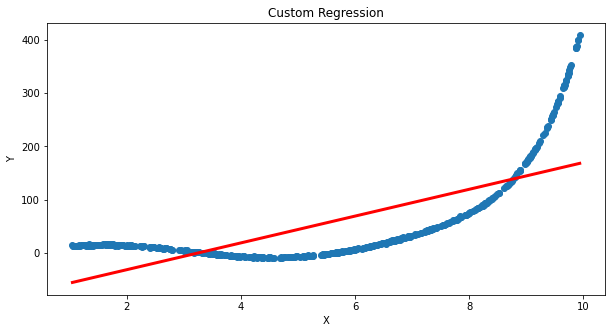

In [16]:
np.random.seed(42)

# Parameters
n_sample = 500
beta_0   = 2.3
beta_1   = 13
beta_2   = .02
std_dev  = 0.7
liminf_x = 1
limsup_x = 10

# Data simulation
x  = uniform(liminf_x, limsup_x, size=n_sample)
mu = beta_0 + beta_1*np.sin(x) + beta_2*np.exp(x)
y  = normal(mu, std_dev)

# To have the intercept in the model
x_with_intercept = sm.add_constant(x)

# Regression
model = sm.OLS(y, x_with_intercept)
model = model.fit()
print(model.summary())

# Regression Line
y_pred = model.predict(x_with_intercept)
idx = x.argsort()
x_ord, y_pred_ord = x[idx], y_pred[idx]

# Plot
plt.figure(figsize=(10,5));
plt.scatter(x, y);
plt.plot(x_ord, y_pred_ord, color='red', linewidth=3);
plt.title('Custom Regression');
plt.xlabel('X');
plt.ylabel('Y');

## **2.** Predicting with GLM (Gaussian family)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  500
Model:                            GLM   Df Residuals:                      498
Model Family:                Gaussian   Df Model:                            1
Link Function:                    log   Scale:                          69.376
Method:                          IRLS   Log-Likelihood:                -1768.4
Date:                Wed, 15 Jun 2022   Deviance:                       34549.
Time:                        15:57:18   Pearson chi2:                 3.45e+04
No. Iterations:                     8   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.9526      0.062    -47.637      0.0

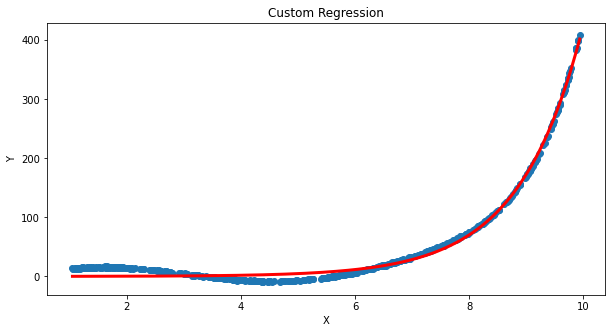

In [17]:
np.random.seed(42)

# Parameters
n_sample = 500
beta_0   = 2.3
beta_1   = 13
beta_2   = .02
std_dev  = 0.7
liminf_x = 1
limsup_x = 10

# Data simulation
x  = uniform(liminf_x, limsup_x, size=n_sample)
mu = beta_0 + beta_1*np.sin(x) + beta_2*np.exp(x)
y  = normal(mu, std_dev)

# To have the intercept in the model
x_with_intercept = sm.add_constant(x)

# Regression
model = sm.GLM(y, x_with_intercept, family=sm.families.Gaussian(sm.families.links.log()))
model = model.fit()
print(model.summary())

# Regression Line
y_pred = model.predict(x_with_intercept)
idx = x.argsort()
x_ord, y_pred_ord = x[idx], y_pred[idx]

# Plot
plt.figure(figsize=(10,5));
plt.scatter(x, y);
plt.plot(x_ord, y_pred_ord, color='red', linewidth=3);
plt.title('Custom Regression');
plt.xlabel('X');
plt.ylabel('Y');

## **3.** Predicting with **wrong** formula

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     268.3
Date:                Wed, 15 Jun 2022   Prob (F-statistic):           9.67e-80
Time:                        15:57:20   Log-Likelihood:                -2795.7
No. Observations:                 500   AIC:                             5597.
Df Residuals:                     497   BIC:                             5610.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -84.0253      7.851    -10.702      0.0

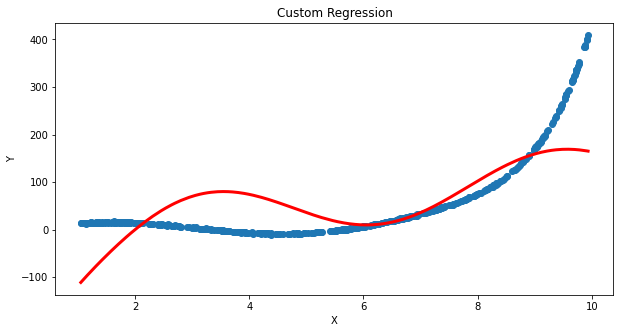

In [18]:
np.random.seed(42)

# Parameters
n_sample = 500
beta_0   = 2.3
beta_1   = 13
beta_2   = .02
std_dev  = 0.7
liminf_x = 1
limsup_x = 10

# Data simulation
x  = uniform(liminf_x, limsup_x, size=n_sample)
mu = beta_0 + beta_1*np.sin(x) + beta_2*np.exp(x)
y  = normal(mu, std_dev)

data = pd.DataFrame(x, columns=['x'])
data['y'] = y

# Regression
model = smf.ols(formula='y ~ 1 + np.cos(x) + np.log(x)', data=data)
model = model.fit()
print(model.summary())

# Regression Line
y_pred = model.predict(data[['x']])
idx = x.argsort()
x_ord, y_pred_ord = x[idx], y_pred[idx]

# Plot
plt.figure(figsize=(10,5));
plt.scatter(x, y);
plt.plot(x_ord, y_pred_ord, color='red', linewidth=3);
plt.title('Custom Regression');
plt.xlabel('X');
plt.ylabel('Y');

## **4.** Predicting with **right** formula

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.386e+06
Date:                Wed, 15 Jun 2022   Prob (F-statistic):               0.00
Time:                        15:57:23   Log-Likelihood:                -534.08
No. Observations:                 500   AIC:                             1074.
Df Residuals:                     497   BIC:                             1087.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3117      0.037     61.915      0.0

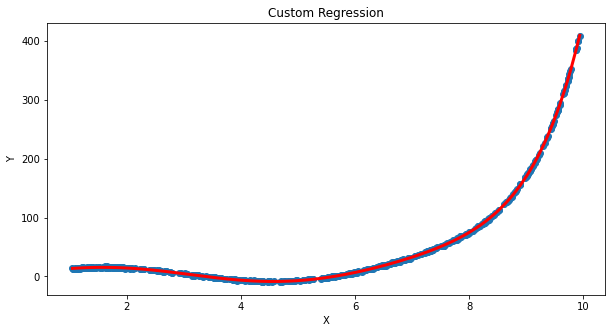

In [19]:
np.random.seed(42)

# Parameters
n_sample = 500
beta_0   = 2.3
beta_1   = 13
beta_2   = .02
std_dev  = 0.7
liminf_x = 1
limsup_x = 10

# Data simulation
x  = uniform(liminf_x, limsup_x, size=n_sample)
mu = beta_0 + beta_1*np.sin(x) + beta_2*np.exp(x)
y  = normal(mu, std_dev)

data = pd.DataFrame(x, columns=['x'])
data['y'] = y

# Regression
model = smf.ols(formula='y ~ 1 + np.sin(x) + np.exp(x)', data=data)
model = model.fit()
print(model.summary())

# Regression Line
y_pred = model.predict(data[['x']])
idx = x.argsort()
x_ord, y_pred_ord = x[idx], y_pred[idx]

# Plot
plt.figure(figsize=(10,5));
plt.scatter(x, y);
plt.plot(x_ord, y_pred_ord, color='red', linewidth=3);
plt.title('Custom Regression');
plt.xlabel('X');
plt.ylabel('Y');